In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [4]:
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [6]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Divya/CNN/archive (2)/archive (6)/train',
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='binary',
subset='training'
)

Found 7115 images belonging to 2 classes.


In [7]:
val_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Divya/CNN/archive (2)/archive (6)/val',
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='binary',
subset='validation'
)

Found 120 images belonging to 2 classes.


In [8]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(train_generator, epochs=2, validation_data=val_generator,
batch_size= BATCH_SIZE)

Epoch 1/2
223/223 ━━━━━━━━━━━━━━━━━━━━ 843s 4s/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.4833 - val_loss: 3.8260
Epoch 2/2
223/223 ━━━━━━━━━━━━━━━━━━━━ 1072s 5s/step - accuracy: 0.9933 - loss: 0.0225 - val_accuracy: 0.6250 - val_loss: 4.6823


In [17]:
model.save('/content/drive/MyDrive/Divya/CNN/x-raymodel.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualisation
import numpy as np
model = load_model('/content/drive/MyDrive/Divya/CNN/x-raymodel.h5')
print("Model Loaded")

Model Loaded


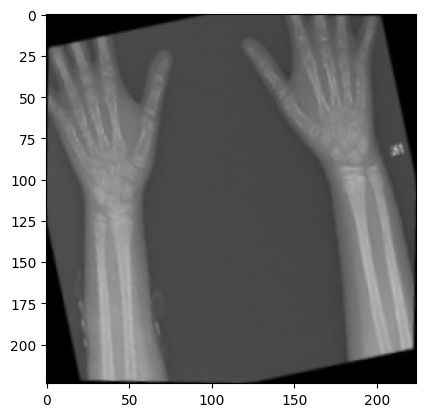

In [26]:
test_image_path="/content/drive/MyDrive/Divya/CNN/archive (2)/archive (6)/train/fractured/10-rotated2-rotated1-rotated2.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [27]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255
prediction =model.predict(img_array)
print(prediction)
if prediction>= 0.5:
 print("Bone is fractured")
else:
 print("Bone is not fractured")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[2.4431235e-09]]
Bone is not fractured
